In [23]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [24]:
df = pd.read_csv('train/train_tp.csv')

In [25]:
df.head()

,recording_id,species_id,songtype_id,t_min,f_min,t_max,f_max
0,003bec244,14,1,44.5440,2531.250,45.1307,5531.25
1,006ab765f,23,1,39.9615,7235.160,46.0452,11283.40
2,007f87ba2,12,1,39.1360,562.500,42.2720,3281.25
3,0099c367b,17,4,51.4206,1464.260,55.1996,4565.04
4,009b760e6,10,1,50.0854,947.461,52.5293,10852.70


In [26]:
sample_num = 2
filename = df.recording_id[sample_num] +str('.flac')
tstart = df.t_min[sample_num] 
tend = df.t_max[sample_num]
y, sr = librosa.load('train/' +str(filename))

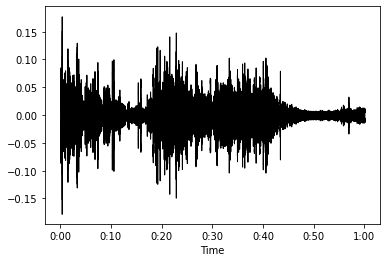

In [27]:
librosa.display.waveshow(y, sr=sr, x_axis='time', color='black')

In [28]:
s = librosa.feature.melspectrogram(y, sr)
mel_spectrogram = librosa.power_to_db(s, ref=np.max)

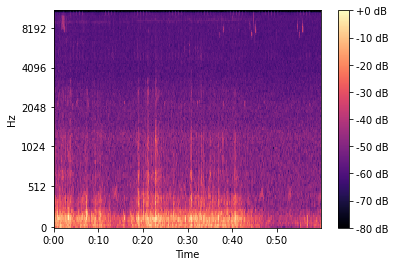

In [29]:
librosa.display.specshow(mel_spectrogram, x_axis="time", y_axis="mel", sr=sr)
plt.colorbar(format='%+2.0f dB')

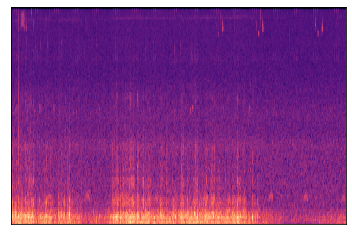

In [30]:
mel_img = librosa.display.specshow(mel_spectrogram)
plt.savefig("images/mel/mel-spectogram-{}".format(df.recording_id[sample_num]))

In [31]:
mfcc = librosa.feature.mfcc(y, sr)

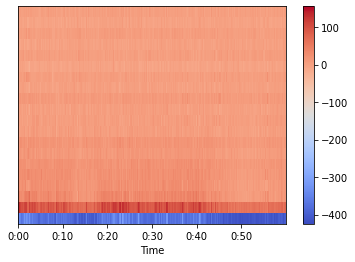

In [32]:
librosa.display.specshow(mfcc, x_axis="time")
plt.colorbar()

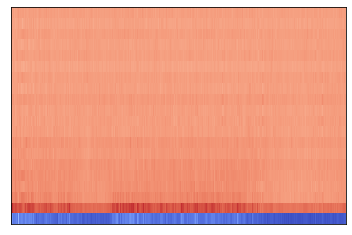

In [33]:
mfcc_img = librosa.display.specshow(mfcc)
plt.savefig("images/mfcc/mfcc-{}".format(df.recording_id[sample_num]))